# Bài thực hành Lab04 - Nhập môn Máy học - Decision Tree

Họ và tên: Huỳnh Quang Trung\
MSSV: 20280108\
Bài làm được thực hiện trên Google Colab.

----

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

In [ ]:
!pip install -U pandas_profiling
!pip install -U pandas
!pip install -U xlrd
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=cb6a70c00713b8df52ffaf5d5eb70f1a558f7846d37d75

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from datetime import datetime
from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/NMMH/Tuan4/HomeWork-churn_rate_prediction.csv"
df = pd.read_csv(PATH)

In [ ]:
df.head()

customer_id              Name  age gender   
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F  \
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date   
0     XW0DQ7H         Village  Platinum Membership   2017-08-17  \
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent   
0                      No    xxxxxxxx  ...         300.63  \
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet   
0              53005.25                     17.0           781.75  \
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint   
0                    Yes                           Yes              No  \
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

## Data Analysis

In [ ]:
df.shape

(36992, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [ ]:
df.describe().T

count          mean           std          min   
age                    36992.0     37.118161     15.867412    10.000000  \
days_since_last_login  36992.0    -41.915576    228.819900  -999.000000   
avg_time_spent         36992.0    243.472334    398.289149 -2814.109110   
avg_transaction_value  36992.0  29271.194003  19444.806226   800.460000   
points_in_wallet       33549.0    686.882199    194.063624  -760.661236   
churn_risk_score       36992.0      3.463397      1.409661    -1.000000   

                              25%        50%        75%           max  
age                       23.0000     37.000     51.000     64.000000  
days_since_last_login      8.0000     12.000     16.000     26.000000  
avg_time_spent            60.1025    161.765    356.515   3235.578521  
avg_transaction_value  14177.5400  27554.485  40855.110  99914.050000  
points_in_wallet         616.1500    697.620    763.950   2069.069761  
churn_risk_score           3.0000      4.000      5.000      5.000000

- Cột `days_since_last_login` là cột chứa thông tin số ngày kể từ lần cuối khách hàng đăng nhập trang web nhưng lại có min = -999 và mean = -41.915576 => Chứa các giá trị sai.
- Tương tự, cột `avg_time_spent` và `point_in_wallet` cũng chứa các giá trị âm.

In [ ]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

Có 3 cột chứa các giá trị khuyết:
- `region_category`
- `preferred_offer_types`
- `points_in_wallet`

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Hàm trả về các giá trị riêng biệt trong từng cột của dataframe
def unique_values(dataframe):
    unique_vals = {}
    for col in dataframe.columns:
        col_sorted = pd.Series(dataframe[col]).sort_values().unique()
        unique_vals[col] = col_sorted
    return unique_vals

In [ ]:
res = unique_values(df)
res

{'customer_id': array(['fffe4300490044003100', 'fffe43004900440031003000',
        'fffe4300490044003100300030003000', ...,
        'fffe4300490044003900390039003700',
        'fffe4300490044003900390039003800',
        'fffe4300490044003900390039003900'], dtype=object),
 'Name': array(['Aaron Achenbach', 'Aaron Bay', 'Aaron Berman', ...,
        'Zoraida Wheeless', 'Zoraida Williamson', 'Zoraida Zerby'],
       dtype=object),
 'age': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64]),
 'gender': array(['F', 'M', 'Unknown'], dtype=object),
 'security_no': array(['000NYHU', '002F9PP', '0038JWG', ..., 'ZZYRKKX', 'ZZYZ9JZ',
        'ZZZAP21'], dtype=object),
 'region_category': array(['City', 'Town', 'Village', nan], dtype=object),
 'membership_category': array(['Basic Membership', 'Gold Mem

Ta thấy ở một số cột có mang các giá trị dữ liệu đặc biệt, cụ thể:
- Cột `region_category`, `preferred_offer_types` và `points_in_wallet` có chứa giá trị NaN
- Cột `medium_of_operation` và `joined_through_referral` có chứa ký tự "?"
- Cột `days_since_last_login`, `points_in_wallet`, `avg_frequency_login_days` và `avg_time_spent` thể hiện thông tin phải mang giá trị >= 0 nhưng lại đang chứa các giá trị âm.
- Cột `avg_frequency_login_days` là cột numerical nhưng lại đang mang kiểu dữ liệu là string (object)
- Cột `avg_frequency_login_days` chứa giá trị 'Error'
- Cột `churn_risk_score` chứa giá trị -1, trong khi theo như mô tả thì cột này chỉ chứa các giá trị từ 1 đến 5.
- Ngoài ra, cột `gender` còn có giá trị 'Unknown'


## Preprocessing

Để tiền xử lý dữ liệu cho bài toán này ta quyết định sẽ:
- Xóa các cột liên quan đến thông tin riêng tư của khách hàng như: `customer_id`, `Name`, `security_no`, `referral_id` ra khỏi bộ dữ liệu.
- Giữ nguyên giá trị 'Unknown' cho cột `gender`, vì có thể giá trị này thể hiện cho việc thật sự không có thông tin về giới tính của khách hàng.
- Chuyển các ký tự '?' thành 'Unknown', vì có thể ký hiệu '?' thể hiện cho việc không có thông tin này từ khách hàng.
- Thay thế các giá trị âm trong cột `days_since_last_login` thành mode() của các giá trị dương trong cột này.
- Thay thế các giá trị âm của cột `points_in_wallet`, `avg_time_spent` thành giá trị median của các giá trị dương trong cột này.
- Chuyển kiểu dữ liệu của cột `avg_frequency_login_days` từ string sang float, sau đó thay thế các giá trị âm trong cột này bằng median của các giá trị dương.
- Chuyển kiểu dữ liệu của cột `joining_date` và `last_visit_time` sang datetime.
- Loại bỏ các dòng dữ liệu "Error" trong cột  `avg_frequency_login_days`
- Loại bỏ các dòng dữ liệu bị gắn nhãn sai trong cột `churn_risk_score`
- Xử lý các NaN bằng cách:
 - Thay thế chúng bằng 'Unknown' nếu như cột đó là categorical
 - Thay thế chúng bằng giá trị mean nếu như cột đó là numerical

In [ ]:
# Xử lý các cột có chứa NaN, nếu là cột numerical thì fill NaN bằng mean, nếu là cột categorical thì fill NaN bằng "Unknown"
def miss_value_preprocessing(df):
  for col in df.columns:
      if df[col].isnull().sum() != 0:
          if df[col].dtype=='int64':
              value=int(np.mean(df[col]))
              df[col].fillna(value,inplace=True)
          elif df[col].dtype=='float64':
              value=np.mean(df[col])
              df[col].fillna(value,inplace=True)
          else:
              df[col].fillna('Unknown', inplace=True)

In [ ]:
def replace_question_mark(df):
  for col in df.columns:
    df[col] = df[col].replace('?', 'Unknown')

In [ ]:
def preprocessing_data(df):
  
    preprocessed_df = df.copy()
    # Loại bỏ cột id của khách hàng 
    preprocessed_df.drop('customer_id', axis=1, inplace=True)
    
    # Loại bỏ cột tên của khách hàng
    preprocessed_df.drop('Name', axis=1, inplace=True)

    # Loại bỏ cột chứa mã số bảo mật của khách hàng
    preprocessed_df.drop('security_no', axis=1, inplace=True)

    # Loại bỏ cột id của người giới thiệu
    preprocessed_df.drop('referral_id', axis=1, inplace=True)

    
    # Thay thế các ký hiệu '?' thành 'Unknown'
    replace_question_mark(preprocessed_df)

    # Thay thế các giá trị âm trong cột 'days_since_last_login' thành mode() của các giá trị dương trong cột này
    preprocessed_df.loc[preprocessed_df['days_since_last_login'] < 0, 'days_since_last_login'] = preprocessed_df['days_since_last_login'].loc[preprocessed_df['days_since_last_login'] > 0].mode()[0]
    
    # Thay thế các giá trị âm của cột 'points_in_wallet' thành giá trị median của các giá trị dương trong cột này
    preprocessed_df.loc[preprocessed_df['points_in_wallet'] < 0, 'points_in_wallet'] = preprocessed_df['points_in_wallet'].loc[preprocessed_df['points_in_wallet'] > 0].median()
    
    # Thay thế các giá trị âm trong cột 'avg_time_spent' thành giá trị median của các giá trị dương trong vột này
    preprocessed_df.loc[preprocessed_df['avg_time_spent'] < 0, 'avg_time_spent'] = preprocessed_df['avg_time_spent'].loc[preprocessed_df['avg_time_spent'] > 0].median()

    # Thực hiện xử lý các cột có dữ liệu NaN
    miss_value_preprocessing(preprocessed_df)

    # Loại bỏ các dòng có dữ liệu bị Error
    preprocessed_df = preprocessed_df.loc[preprocessed_df['avg_frequency_login_days'] != 'Error']

    # Chuyển kiểu dữ liệu từ string sang float
    preprocessed_df['avg_frequency_login_days'] = preprocessed_df['avg_frequency_login_days'].astype('float64')

    # Thay thế các giá trị âm trong cột 'avg_frequency_login_days' thành giá trị median của các giá trị dương trong vột này
    preprocessed_df.loc[preprocessed_df['avg_frequency_login_days'] < 0, 'avg_frequency_login_days'] = preprocessed_df['avg_frequency_login_days'].loc[preprocessed_df['avg_frequency_login_days'] > 0].median()
    
    # Loại bỏ các dòng dữ liệu bị gắn nhãn sai
    preprocessed_df = preprocessed_df.loc[preprocessed_df['churn_risk_score'] != -1]

    # Chuyển dữ liệu cột 'joining_date' sang kiểu datetime
    preprocessed_df['joining_date'] = pd.to_datetime(preprocessed_df['joining_date'], format='%Y-%m-%d')

    # Chuyển dữ liệu cột 'last_visit_time' sang kiểu time
    preprocessed_df['last_visit_time'] = preprocessed_df['last_visit_time'].apply(lambda x: datetime.strptime(x, "%H:%M:%S").time())

    return preprocessed_df

In [ ]:
preprocessed_df = preprocessing_data(df)
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32410 entries, 0 to 36990
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           32410 non-null  int64         
 1   gender                        32410 non-null  object        
 2   region_category               32410 non-null  object        
 3   membership_category           32410 non-null  object        
 4   joining_date                  32410 non-null  datetime64[ns]
 5   joined_through_referral       32410 non-null  object        
 6   preferred_offer_types         32410 non-null  object        
 7   medium_of_operation           32410 non-null  object        
 8   internet_option               32410 non-null  object        
 9   last_visit_time               32410 non-null  object        
 10  days_since_last_login         32410 non-null  int64         
 11  avg_time_spent                324

## Feature Engineering

- Từ cột `joining_date` ta sẽ tách thành 3 feature khác:
 - `joining_weekday`: Thể hiện ngày thứ mấy trong tuần, từ thứ 2 đến chủ nhật, tương ứng từ 0 đến 6.
 - `joining_week`: Thể hiện tuần thứ mấy trong năm, từ 1 đến 53.
 - `joining_month`: Thể hiện tháng trong năm, từ 1 đến 12.
- Từ cột `last_visit_time` ta chỉ tách thành feature là `last_visit_hour` thể hiện giờ đăng nhập cuối cùng của khách hàng (từ 0 đến 23), còn thông tin về phút và giây sẽ được bỏ đi.

In [ ]:
def apply_feature_engineering(df):
    engineered_df = df.copy()
    # Thêm cột joining_weekday từ cột joining_date
    engineered_df['joining_weekday'] = engineered_df['joining_date'].dt.weekday
    # Thêm cột joining_week từ cột joining_date
    engineered_df['joining_week'] = engineered_df['joining_date'].dt.isocalendar().week
    # Thêm cột joining_week từ cột joining_date
    engineered_df['joining_month'] = engineered_df['joining_date'].dt.month
    engineered_df.drop('joining_date', axis='columns', inplace=True)

    # Thêm cột 'last_visit_hour' từ cột 'last_visit_time'
    engineered_df['last_visit_hour'] = engineered_df['last_visit_time'].apply(lambda x : x.hour)
    engineered_df.drop('last_visit_time', axis='columns', inplace=True)

    # LabelEncoder các cột categorical
    categorical_cols = [feature for feature in engineered_df.columns if engineered_df[feature].dtype == "O"]
    le = LabelEncoder()
    for index in categorical_cols:
      engineered_df[index] = le.fit_transform(engineered_df[index])
    return engineered_df

In [ ]:
engineered_df = apply_feature_engineering(preprocessed_df)
engineered_df.head()

age  gender  region_category  membership_category  joined_through_referral   
0   18       0                3                    3                        0  \
1   32       0                0                    4                        1   
2   44       0                1                    2                        2   
3   37       1                0                    2                        2   
4   31       0                0                    2                        0   

   preferred_offer_types  medium_of_operation  internet_option   
0                      1                    3                2  \
1                      1                    1                1   
2                      1                    1                2   
3                      1                    1                1   
4                      0                    2                1   

   days_since_last_login  avg_time_spent  ...  used_special_discount   
0                     17          300.63  ...                      1  \
1                     16          306.34  ...                      1   
2                     14          516.16  ...                      0   
3                     11           53.27  ...                      0   
4                     20          113.13  ...                      0   

   offer_application_preference  past_complaint  complaint_status  feedback   
0                             1               0                 1         4  \
1                             0               1                 2         5   
2                             1               1                 3         3   
3                             1               1                 4         3   
4                             1               1                 2         3   

   churn_risk_score  joining_weekday  joining_week  joining_month   
0                 2                3            33              8  \
1                 1                0            35              8   
2                 5                4            45             11   
3                 5                5            43             10   
4                 5                1            37              9   

   last_visit_hour  
0               16  
1               12  
2               22  
3               15  
4               15  

[5 rows x 23 columns]

In [ ]:
engineered_df.churn_risk_score.value_counts()

churn_risk_score
3    9436
4    9219
5    8879
2    2470
1    2406
Name: count, dtype: int64

Ta thấy dữ liệu có hiện tượng imbalance khi mà số mẫu ở label 1 và 2 ít hơn khoảng 3 lần so với các label còn lại.

## Prepare X,y

In [ ]:
def prepare_X_y(df):
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")

    X = df[feature_names].values
    y = df.churn_risk_score.values
    return X, y

In [ ]:
X, y = prepare_X_y(engineered_df)

# Apply machine learning model

## Train-test split

In [ ]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Up-Sampling data

Trong machine learning, up-sampling được sử dụng để giải quyết vấn đề mất cân bằng dữ liệu (imbalanced data). Mất cân bằng dữ liệu xảy ra khi số lượng mẫu của một lớp dữ liệu là rất ít so với số lượng mẫu của các lớp khác. Điều này có thể dẫn đến các mô hình học máy không hiệu quả và không chính xác khi phân loại các mẫu.

Up-sampling có thể được sử dụng để tăng số lượng mẫu trong lớp thiểu số bằng cách tạo ra các mẫu mới từ các mẫu hiện có trong lớp đó. Các phương pháp up-sampling bao gồm lặp lại các mẫu hiện có trong lớp thiểu số, chèn thêm các mẫu giữa các mẫu hiện có, hoặc tạo ra các mẫu mới bằng cách sử dụng các kỹ thuật như SMOTE (Synthetic Minority Over-sampling Technique).

Việc sử dụng up-sampling có thể cải thiện hiệu suất của các mô hình học máy trong việc phân loại dữ liệu mất cân bằng. Tuy nhiên, nó cũng có thể dẫn đến overfitting nếu sử dụng không đúng cách, vì các mẫu được tạo ra có thể không phản ánh chính xác dữ liệu thực tế.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_oversampling, y_train_oversampling = smote.fit_resample(trainX, trainY)

In [ ]:
s = trainY.copy()
temp = pd.Series(s)
temp.value_counts()

3    6540
4    6498
5    6224
2    1735
1    1690
Name: count, dtype: int64

In [ ]:
s = y_train_oversampling.copy()
temp = pd.Series(s)
temp.value_counts()

4    6540
5    6540
1    6540
3    6540
2    6540
Name: count, dtype: int64

Sau khi sử dụng phương pháp up sampling, tổng số mẫu ở các label đã trở nên đồng đều, giúp các mô hình được xây dựng có khả năng phân loại tốt hơn trên các lớp.

## DecisionTree Model and RandomForest Model

### Decision Tree

Xây dựng mô hình Decision tree với các tham số mặc định

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state = 42)

decision_tree_model.fit(X_train_oversampling, y_train_oversampling)
predicted_label_test = decision_tree_model.predict(testX)
predicted_label_train = decision_tree_model.predict(trainX)
print(classification_report(trainY, predicted_label_train))
print(classification_report(testY, predicted_label_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1690
           2       1.00      1.00      1.00      1735
           3       1.00      1.00      1.00      6540
           4       1.00      1.00      1.00      6498
           5       1.00      1.00      1.00      6224

    accuracy                           1.00     22687
   macro avg       1.00      1.00      1.00     22687
weighted avg       1.00      1.00      1.00     22687

              precision    recall  f1-score   support

           1       0.69      0.72      0.70       716
           2       0.72      0.68      0.70       735
           3       0.91      0.90      0.90      2896
           4       0.65      0.67      0.66      2721
           5       0.75      0.74      0.75      2655

    accuracy                           0.76      9723
   macro avg       0.74      0.74      0.74      9723
weighted avg       0.76      0.76      0.76      9723



### Random Forest

Xây dựng mô hình random forest với các tham số mặc định

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_oversampling, y_train_oversampling)

predicted_label_train = random_forest_model.predict(trainX)
print(classification_report(trainY, predicted_label_train))

predicted_label_test = random_forest_model.predict(testX)
print(classification_report(testY, predicted_label_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1690
           2       1.00      1.00      1.00      1735
           3       1.00      1.00      1.00      6540
           4       1.00      1.00      1.00      6498
           5       1.00      1.00      1.00      6224

    accuracy                           1.00     22687
   macro avg       1.00      1.00      1.00     22687
weighted avg       1.00      1.00      1.00     22687

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       716
           2       0.76      0.73      0.75       735
           3       0.90      0.89      0.90      2896
           4       0.68      0.60      0.64      2721
           5       0.72      0.82      0.77      2655

    accuracy                           0.77      9723
   macro avg       0.76      0.76      0.76      9723
weighted avg       0.77      0.77      0.77      9723



Ta thấy tất cả thông số về precision, recall, f1-score hay accuracy của cả 2 mô hình Decision Tree và Random Forest ở tập huấn luyện đều rất cao (1.00), tuy nhiên khi thực hiện dự đoán ở trên tập testing thì độ chính xác tụt xuống thấp hơn hẳn với accuracy = 0.76 (Decision Tree) và accuracy = 0.77 (Random Forest), điều này cho thấy cả 2 model đang bị overfitting rất nặng, không có tính tổng quát và không thể áp dụng để phân loại trên các tập dữ liệu khác.

## XGBoost and CatBoost Model

### XGBoost Model

XGBoost là một thuật toán học máy phổ biến, mạnh mẽ và hiệu quả để giải quyết các bài toán phân loại và dự đoán. Nó dựa trên phương pháp boosting trees, tức là kết hợp nhiều cây quyết định để tạo ra một mô hình dự đoán tốt hơn.

Mô hình XGBoost sử dụng phương pháp gradient boosting, trong đó mỗi cây quyết định được huấn luyện để đưa ra các dự đoán cho sai số còn lại của mô hình trước đó. Quá trình này tiếp tục cho đến khi sai số được giảm đến mức độ mong muốn hoặc không còn giảm được nữa.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xgb_y_train_oversampling = le.fit_transform(y_train_oversampling) # XGBoost yêu cầu các nhãn đầu vào phải từ 0 -> (n-1) với n là số lượng các label


XGB_model = XGBClassifier(seed = 42)
XGB_model.fit(X_train_oversampling, xgb_y_train_oversampling)

predicted_label_train = XGB_model.predict(trainX)
predicted_label_train = le.inverse_transform(predicted_label_train)
print(classification_report(trainY, predicted_label_train))

predicted_label_test = XGB_model.predict(testX)
predicted_label_test = le.inverse_transform(predicted_label_test)
print(classification_report(testY, predicted_label_test))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1690
           2       0.99      0.99      0.99      1735
           3       0.99      0.99      0.99      6540
           4       0.98      0.92      0.95      6498
           5       0.92      0.98      0.95      6224

    accuracy                           0.97     22687
   macro avg       0.98      0.98      0.97     22687
weighted avg       0.97      0.97      0.97     22687

              precision    recall  f1-score   support

           1       0.73      0.75      0.74       716
           2       0.75      0.73      0.74       735
           3       0.92      0.89      0.91      2896
           4       0.68      0.61      0.64      2721
           5       0.72      0.82      0.77      2655

    accuracy                           0.77      9723
   macro avg       0.76      0.76      0.76      9723
weighted avg       0.77      0.77      0.77      9723



Khi xây dựng mô hình XGBoost với các tham số mặc định thì mô hình cho ra kết quả trên tập train đã cải thiện hơn so với 2 mô hình phía trước khi các thông số mectric đã giảm đi một ít nhưng kết quả trên tập test vẫn giữ được kết quả tương đương, cho thấy nó có khả năng tổng quát hóa tốt hơn 2 mô hình trước đó. Tuy nhiên, các thông số ở trên vẫn chỉ ra rằng mô hình vẫn còn overfitting khá nặng.

### CatBoost Model

CatBoost là một thuật toán dùng để tăng cường độ dốc trên Decision Tree. Nó được phát triển bởi các nhà nghiên cứu và kỹ sư của Yandex và được sử dụng cho tìm kiếm, hệ thống đề xuất, trợ lý cá nhân, xe tự lái, dự báo thời tiết.
Catboost có một số ưu điểm như:
- Giảm thời gian điều chỉnh tham số, vì CatBoost cung cấp kết quả tuyệt vời với các tham số mặc định
- Categorical features support: Cải thiện kết quả đào tạo bằng cách cho phép bạn sử dụng các yếu tố không phải là số, thay vì phải xử lý trước dữ liệu của bạn hoặc dành thời gian và công sức để chuyển dữ liệu dạng categorical thành dạng số.
- Huấn luyện mô hình trên một cách triển khai nhanh thuật toán tăng độ dốc cho GPU.
- Giảm overfitting khi xây dựng các mô hình.
- Fast prediction: Áp dụng mô hình được đào tạo một cách nhanh chóng và hiệu quả.

Theo mô tả tại: https://catboost.ai/

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(random_seed = 42)
catboost_model.fit(X_train_oversampling, y_train_oversampling)


predicted_label_train = catboost_model.predict(trainX)
print(classification_report(trainY, predicted_label_train))
predicted_label_test = catboost_model.predict(testX)
print(classification_report(testY, predicted_label_test))

Learning rate set to 0.094529
0:	learn: 1.4442485	total: 64.9ms	remaining: 1m 4s
1:	learn: 1.3225984	total: 134ms	remaining: 1m 6s
2:	learn: 1.2257609	total: 191ms	remaining: 1m 3s
3:	learn: 1.1515632	total: 255ms	remaining: 1m 3s
4:	learn: 1.0840961	total: 318ms	remaining: 1m 3s
5:	learn: 1.0168194	total: 372ms	remaining: 1m 1s
6:	learn: 0.9639954	total: 425ms	remaining: 1m
7:	learn: 0.9145351	total: 487ms	remaining: 1m
8:	learn: 0.8768578	total: 541ms	remaining: 59.6s
9:	learn: 0.8443977	total: 596ms	remaining: 59s
10:	learn: 0.8130789	total: 650ms	remaining: 58.4s
11:	learn: 0.7841346	total: 708ms	remaining: 58.3s
12:	learn: 0.7519225	total: 773ms	remaining: 58.7s
13:	learn: 0.7236033	total: 823ms	remaining: 58s
14:	learn: 0.7027857	total: 873ms	remaining: 57.3s
15:	learn: 0.6830032	total: 929ms	remaining: 57.1s
16:	learn: 0.6669517	total: 997ms	remaining: 57.6s
17:	learn: 0.6503048	total: 1.05s	remaining: 57.2s
18:	learn: 0.6377379	total: 1.1s	remaining: 56.7s
19:	learn: 0.6208013	

Tương tự như XGBoost thì Catboots cũng đã kiểm soát được một ít hiện tượng overfitting và có tăng hiệu quả trên tập test, nhưng dựa trên kết quả ở tập test thì mô hình có vẻ vẫn đang gặp phải hiện tượng overfitting tương đối nặng.

## Giảm Overfitting trên Decision Tree và RandomForest

Decision tree là một thuật toán học máy phi tham số cho nên nó thường xảy thường xảy ra hiện tượng Overfitting. Ta có thể tránh hiện tượng này bằng phương pháp cắt tỉa cây (pruning).

### Giảm Overfitting trên Decision Tree/Random Forest bằng Pruning.

Pruning trong Decision Tree là quá trình giảm thiểu kích thước của cây quyết định (Decision Tree) bằng cách loại bỏ các nút không quan trọng hoặc giảm thiểu sự phức tạp của mô hình. Pruning giúp ngăn chặn hiện tượng overfitting trong mô hình Decision Tree.

Có hai loại pruning trong Decision Tree:
- Pre-pruning: Khi xây dựng cây quyết định, một số tiêu chí được sử dụng để quyết định việc dừng sớm quá trình tách nút. Ví dụ, khi số lượng mẫu trong một nút không đủ lớn để phân chia tiếp, thì nút đó sẽ không được phân chia nữa và được đánh dấu là một nút lá. Các tiêu chí có thể được sử dụng để pruning như `max_depth/min_samples_leaf/min_samples_split`.
- Post-pruning: Sau khi cây quyết định đã được xây dựng, quá trình pruning bắt đầu bằng cách loại bỏ các nút lá không quan trọng. Các nút lá không quan trọng là các nút mà việc loại bỏ nó không làm giảm đáng kể độ chính xác của mô hình. Để thực hiện post-pruning, một số phương pháp được sử dụng như: Reduced-Error Pruning, Chi-Squared Pruning và Cost Complexity Pruning (CCP).

Ở đây, ta sẽ dùng phương pháp Post-pruning với cost complexity pruning. Cost complexity pruning liên quan đến việc tìm giá trị phù hợp cho tham số `ccp_alpha` trong model Decision Tree. Chúng ta sẽ lấy các giá trị cost complexity pruning của model Decision Tree mặc định đã được xây dựng ở trên và lần lượt kiểm tra độ chính xác của các cây đã được cắt tỉa với tham số  `ccp_alpha` tương ứng.

In [ ]:
path = decision_tree_model.cost_complexity_pruning_path(X_train_oversampling, y_train_oversampling)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.52125070e-05 1.74520070e-05 ... 3.98485073e-02
 7.01920585e-02 1.22266748e-01]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_oversampling, y_train_oversampling)
    clfs.append(clf)

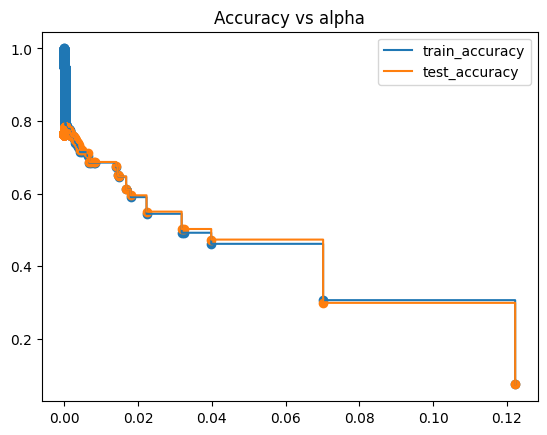

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(trainX)
    y_test_pred = c.predict(testX)
    train_acc.append(accuracy_score(y_train_pred, trainY))
    test_acc.append(accuracy_score(y_test_pred, testY))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

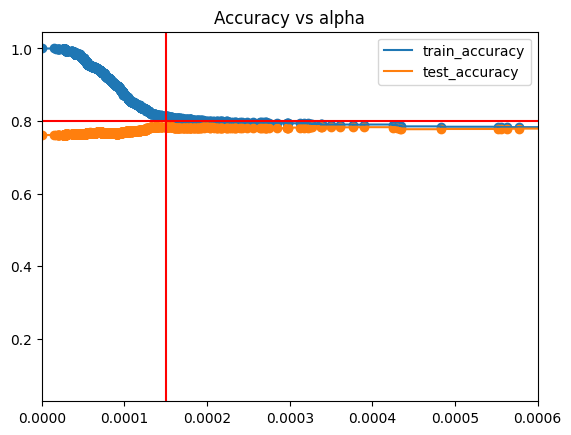

In [ ]:
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.xlim(0, 0.0006)
plt.axhline(y=0.80, color="r")
plt.axvline(x=0.00015, color="r")
plt.show()

Ta có thể chọn ccp_alpha = 0.00015

In [ ]:
clf_ = DecisionTreeClassifier(ccp_alpha=0.00015, random_state = 42)
clf_.fit(X_train_oversampling, y_train_oversampling)
y_train_pred = clf_.predict(trainX)
y_test_pred = clf_.predict(testX)

print(f'Train score {accuracy_score(y_train_pred, trainY)}')
print(f'Test score {accuracy_score(y_test_pred, testY)}')

Train score 0.8138581566535902
Test score 0.7836058829579348


In [ ]:
print(classification_report(trainY, y_train_pred))
print(classification_report(testY, y_test_pred))

              precision    recall  f1-score   support

           1       0.85      0.91      0.88      1690
           2       0.91      0.85      0.88      1735
           3       0.93      0.91      0.92      6540
           4       0.79      0.57      0.66      6498
           5       0.71      0.94      0.81      6224

    accuracy                           0.81     22687
   macro avg       0.84      0.83      0.83     22687
weighted avg       0.82      0.81      0.81     22687

              precision    recall  f1-score   support

           1       0.74      0.76      0.75       716
           2       0.76      0.74      0.75       735
           3       0.93      0.89      0.91      2896
           4       0.75      0.55      0.63      2721
           5       0.70      0.92      0.80      2655

    accuracy                           0.78      9723
   macro avg       0.77      0.77      0.77      9723
weighted avg       0.79      0.78      0.78      9723



Bằng việc pruning (cắt tỉa cây) thông qua tham số ccp_alpha thì ta đã có thể giảm bớt hiện tượng overfitting trên mô hình Decision Tree. Mô hình cho ra kết quả tương đối tốt trên cả tập train và tập test với các độ đo ở ngưỡng chấp nhập được và trông khá cân bằng với nhau. Mô hình đã có tính tổng quát hơn rất nhiều.

Tương tự như Decision Tree, ta cũng có thể kiểm soát hiện tượng overfitting trên RandomForest bằng cách điều chỉnh tham số `ccp_alpha` trong mô hình.

Ngoài ra, chúng ta còn có thể sử dụng GridSearchCV để điều chỉnnh các tham số như `max_depth/min_samples_leaf/min_samples_split ...` cũng có thể làm giảm bớt hiện tượng overfitting trên Decision tree và RandomForest. Cách làm này chính là một triển khai của phương pháp Pre-Pruning

## Giảm overfitting trên XGBoost và CatBoots

### Kiểm soát overfitting trên XGBoost bằng cách điều chỉnh một số hyperparameter

Bằng việc điều chỉnh một số hyperparameter trong XGBoost, ta cũng có thể giảm bớt hiện tượng overfitting.\
Một số tham số có thể dùng để diều chỉnh như: 
- `eta` (hay còn gọi là learning rate): Là một tham số rất quan trọng, xác định độ lớn của các bước cập nhật trong quá trình gradient descent. Giá trị của eta càng nhỏ thì mô hình sẽ càng hội tụ chậm nhưng sẽ có độ chính xác cao hơn. Giá trị nằm trong khoảng từ 0 đến 1.
- `max_depth`: Độ sâu tối đa của các decision trees.
- `subsample`: Xác định tỉ lệ số lượng mẫu được sử dụng trong mỗi lần huấn luyện. Ví dụ: subsample=0.5 tức là mô hình sử dụng 50% dữ liệu trong mỗi lần huấn luyện.
- `colsample_bytree`: Xác định tỉ lệ số lượng features được sử dụng trong mỗi lần huấn luyện.
- `gamma`: Xác định mức giảm thiểu mất mát để một node tiếp tục được tách ra.
- `reg_alpha`: Xác định l1 regularization cho các weights trong mô hình.
- `reg_lambda`: Xác định l2 regularization cho các weights trong mô hình.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

xgb_optimization_y_train_oversampling = le.fit_transform(y_train_oversampling)


XGB_model_optimization = XGBClassifier(eta = 0.01, max_depth=10, seed= 42, reg_lambda = 1.5)

XGB_model_optimization.fit(X_train_oversampling, xgb_optimization_y_train_oversampling)

predicted_label_train = XGB_model_optimization.predict(trainX)
predicted_label_train = le.inverse_transform(predicted_label_train)
print(classification_report(trainY, predicted_label_train))

predicted_label_test = XGB_model_optimization.predict(testX)
predicted_label_test = le.inverse_transform(predicted_label_test)
print(classification_report(testY, predicted_label_test))

              precision    recall  f1-score   support

           1       0.88      0.95      0.92      1690
           2       0.95      0.88      0.91      1735
           3       0.95      0.97      0.96      6540
           4       0.93      0.62      0.75      6498
           5       0.74      0.98      0.85      6224

    accuracy                           0.87     22687
   macro avg       0.89      0.88      0.88     22687
weighted avg       0.88      0.87      0.86     22687

              precision    recall  f1-score   support

           1       0.73      0.83      0.78       716
           2       0.81      0.69      0.75       735
           3       0.91      0.91      0.91      2896
           4       0.76      0.51      0.61      2721
           5       0.70      0.93      0.80      2655

    accuracy                           0.78      9723
   macro avg       0.78      0.78      0.77      9723
weighted avg       0.79      0.78      0.77      9723



Nhưng để tối ưu nhất, ta nên thử qua thật nhiều bộ tham số khác nhau để thu được mô hình với kết quả tốt nhất, có thể thực hiện việc này với sự hỗ trợ của GridSearchCV.

### Kiểm soát overfitting trên CatBoost bằng cách điều chỉnh các hyperparameters

Đối với CatBoost ta cũng có thể kiểm soát hiện tượng overfitting bằng cách điều chỉnh một số hyperparameter trong mô hình như:
- `learning_rate`: Nếu xảy ra hiện tượng overfitting, có thể giảm bớt learning_rate.
- `depth`: Độ sau của mỗi cây. Trong hầu hết các trường hợp thì độ sâu tối ưu nằm trong khoảng từ 4 đến 10. Trong đó, khoảng từ 6 đến 10 được khuyến nghị bởi catboots.
- `l2_leaf_reg`: áp dụng phương pháp regularization chuẩn L2
- `iterations`: xác định số lượng vòng lặp (iterations) trong quá trình huấn luyện mô hình.
- `loss_function`: Được sử dụng để xác định hàm mất mát (loss function) sẽ được sử dụng trong quá trình huấn luyện mô hình.

Ta có thể kết hợp sử dụng sử dụng GridSearch để tìm ra bộ tham số tốt nhất để vừa giảm kiểm soát overfitting vừa tối ưu mô hình một cách tốt nhất.

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(learning_rate = 0.01, depth = 6, l2_leaf_reg = 0.1, random_seed = 42)
catboost_model.fit(X_train_oversampling, y_train_oversampling)


predicted_label_train = catboost_model.predict(trainX)
print(classification_report(trainY, predicted_label_train))
predicted_label_test = catboost_model.predict(testX)
print(classification_report(testY, predicted_label_test))

0:	learn: 1.5909210	total: 64.9ms	remaining: 1m 4s
1:	learn: 1.5727441	total: 119ms	remaining: 59.3s
2:	learn: 1.5552054	total: 182ms	remaining: 1m
3:	learn: 1.5386916	total: 236ms	remaining: 58.7s
4:	learn: 1.5223578	total: 296ms	remaining: 58.9s
5:	learn: 1.5065953	total: 350ms	remaining: 58s
6:	learn: 1.4914429	total: 434ms	remaining: 1m 1s
7:	learn: 1.4763576	total: 509ms	remaining: 1m 3s
8:	learn: 1.4619596	total: 564ms	remaining: 1m 2s
9:	learn: 1.4477563	total: 619ms	remaining: 1m 1s
10:	learn: 1.4338784	total: 687ms	remaining: 1m 1s
11:	learn: 1.4206390	total: 744ms	remaining: 1m 1s
12:	learn: 1.4067216	total: 800ms	remaining: 1m
13:	learn: 1.3940543	total: 856ms	remaining: 1m
14:	learn: 1.3816249	total: 911ms	remaining: 59.8s
15:	learn: 1.3700855	total: 967ms	remaining: 59.5s
16:	learn: 1.3582483	total: 1.02s	remaining: 59.1s
17:	learn: 1.3465968	total: 1.08s	remaining: 58.7s
18:	learn: 1.3352910	total: 1.13s	remaining: 58.3s
19:	learn: 1.3240134	total: 1.19s	remaining: 58.1s


**Ngoài ra, khi sử dụng CatBoost, ta có thể không cần phải one-hot encoding các feature là categorical mà có thể đưa tiếp các feature này vào mô hình. Ví dụ như sau**

In [ ]:
def apply_feature_engineering_catboots(df):
    engineered_df = df.copy()
    engineered_df['joining_weekday'] = engineered_df['joining_date'].dt.weekday
    engineered_df['joining_week'] = engineered_df['joining_date'].dt.isocalendar().week
    engineered_df['joining_month'] = engineered_df['joining_date'].dt.month
    engineered_df.drop('joining_date', axis='columns', inplace=True)
    engineered_df['last_visit_hour'] = engineered_df['last_visit_time'].apply(lambda x : x.hour)
    engineered_df.drop('last_visit_time', axis='columns', inplace=True)
    
    return engineered_df

In [ ]:
catboots_df = df.copy()
catboots_df_preprocessed = preprocessing_data(catboots_df)
catboots_df_engineered = apply_feature_engineering_catboots(catboots_df_preprocessed)
catboost_X, catboost_Y = prepare_X_y(catboots_df_engineered)
trainX_cb, testX_cb ,trainY_cb, testY_cb = train_test_split(catboost_X, catboost_Y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
categorical_var = [1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21] # Index của các feature dạng categorical

In [ ]:
catboost_model_ = CatBoostClassifier()
catboost_model_.fit(trainX_cb, trainY_cb, cat_features = categorical_var, plot=False)

predicted_label_train = catboost_model_.predict(trainX_cb)
print(classification_report(trainY_cb, predicted_label_train))
predicted_label_test = catboost_model_.predict(testX_cb)
print(classification_report(testY_cb, predicted_label_test))

Learning rate set to 0.092783
0:	learn: 1.3993032	total: 753ms	remaining: 12m 31s
1:	learn: 1.2471846	total: 1.38s	remaining: 11m 31s
2:	learn: 1.1330711	total: 2s	remaining: 11m 5s
3:	learn: 1.0395775	total: 2.6s	remaining: 10m 48s
4:	learn: 0.9622901	total: 3.23s	remaining: 10m 42s
5:	learn: 0.8946464	total: 3.83s	remaining: 10m 34s
6:	learn: 0.8382251	total: 4.47s	remaining: 10m 33s
7:	learn: 0.7893620	total: 5.33s	remaining: 11m
8:	learn: 0.7486635	total: 6.41s	remaining: 11m 46s
9:	learn: 0.7117403	total: 7.59s	remaining: 12m 31s
10:	learn: 0.6799294	total: 8.72s	remaining: 13m 4s
11:	learn: 0.6503681	total: 9.81s	remaining: 13m 27s
12:	learn: 0.6231915	total: 11s	remaining: 13m 53s
13:	learn: 0.5990310	total: 12.1s	remaining: 14m 9s
14:	learn: 0.5779392	total: 13.1s	remaining: 14m 22s
15:	learn: 0.5613553	total: 13.8s	remaining: 14m 8s
16:	learn: 0.5449373	total: 14.5s	remaining: 13m 57s
17:	learn: 0.5300706	total: 15s	remaining: 13m 39s
18:	learn: 0.5184275	total: 15.3s	remainin

Kết quả cho ra từ model này khá tốt, accuracy trên tập train là 0.86 và trên tập test là 0.79, đồng thời các metric trên tập train cũng rất tốt và khá cân bằng với nhau tại mỗi label. Chúng ta cũng chưa cần phải điều chỉnh các hyperparameter cũng đã kiểm soát được overfitting so với model Catboost mặc định mà ta đã xây dựng ở phần đầu.\
Vậy khi sử dụng Catboost với 1 bộ dữ liệu có nhiều feature là categorical, ta có thể xem xét không cần phải label encoder bởi vì trong CatBoost ra đời chính là để giải quyết những bài toán như vậy (CatBoost = Categories + Boosting).

Được tham khảo tại: https://catboost.ai/en/docs/concepts/parameter-tuning

## Build final model

Tuy 2 thuật toán là XGBoost và CatBoost có lẽ sẽ cho ra kết quả tốt hơn trong bài toán này (đặc biệt là model CatBoost với cơ chế tự xử lý categorical) nhưng ở đây ta quyết định sẽ chọn Decision Tree để xây dựng mô hình cuối cùng vì thông qua những mô hình đã xây dựng ở trên thì Decision tree cũng cho ra kết quả khá tốt so với các model còn lại nếu ta kiểm soát được overfitting cho nó, đồng thời decision tree cũng tiết kiệm thời gian hơn khi sử dụng GridSearchCV để tìm ra bộ tham số tối ưu nhất.

### Grid Search

In [ ]:
pipe = Pipeline(steps=[('scaler', StandardScaler(with_mean = False)),
                ('classifier', DecisionTreeClassifier(random_state = 42))])

parameters = {'scaler':[StandardScaler(with_mean= False), Normalizer()],
              'classifier__max_depth': [2, 4, 8, 10, 12],
              'classifier__ccp_alpha': [0.0001, 0.00015, 0.00017, 0.0002],
              'classifier__criterion': ["gini", "entropy", "log_loss"],
             'classifier__min_samples_leaf':[1, 2, 3, 5, 7, 9],
             'classifier__min_samples_split': [2, 3 , 5, 7, 9]}

decision_tree_grid_model = GridSearchCV(pipe, parameters, scoring='f1_macro', cv = 2, n_jobs = 2)
decision_tree_grid_model.fit(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score = %0.3f):" % decision_tree_grid_model.best_score_)
print(decision_tree_grid_model.best_params_)

Best parameter (CV score = 0.775):
{'classifier__ccp_alpha': 0.0001, 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 7, 'scaler': StandardScaler(with_mean=False)}


Dựa vào GridSearch, ta xác định được bộ tham số tối ưu cho Decision Tree như sau:
- `ccp_alpha`: 0.0001
- `classifier__criterion`: entropy
- `max_depth`: 10
- `min_samples_leaf`: 3
- `min_samples_split`: 7
- `scaler`: StandardScaler(with_mean=False)

### Final Model

Tiếp theo ta sẽ build ra một model hoàn chỉnh với các thông số trên để giải quyết bài toán churn rate.

In [ ]:
def build_model(X, y):

    pipe = Pipeline(steps=[('scaler', StandardScaler(with_mean = False)),
                ('classifier', DecisionTreeClassifier(min_samples_split = 7, min_samples_leaf = 3, max_depth = 10, criterion = 'entropy',
                                                      ccp_alpha = 0.0001, random_state = 42))])
    model = pipe.fit(X, y)
    return model

def calculate_performance(y_true, y_pred):
  
    print("precision", precision_score(y_true , y_pred, average = 'macro'))
    print("recall",recall_score(y_true , y_pred, average = 'macro'))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true , y_pred, average = 'macro'))

    main_score = f1_score(y_true , y_pred, average= 'macro')
    return main_score

model = build_model(X_train_oversampling, y_train_oversampling)

train_pred = model.predict(trainX)
print("Training performance:", calculate_performance(trainY, train_pred))
print()
test_pred = model.predict(testX)
print("Testing performance:", calculate_performance(testY, test_pred))

precision 0.8303665332694878
recall 0.8234698918146585
accuracy 0.8211310442103408
F1 0.8173018501003698
Training performance: 0.8173018501003698

precision 0.770787175083328
recall 0.7671292130026126
accuracy 0.7805204155096164
F1 0.7600658475380679
Testing performance: 0.7600658475380679


In [ ]:
predicted_label_test = decision_tree_grid_model.predict(trainX)
print(classification_report(trainY, predicted_label_test))
print()
predicted_label_test = decision_tree_grid_model.predict(testX)
print(classification_report(testY, predicted_label_test))

              precision    recall  f1-score   support

           1       0.79      0.87      0.83      1690
           2       0.86      0.78      0.82      1735
           3       0.93      0.95      0.94      6540
           4       0.85      0.57      0.68      6498
           5       0.72      0.95      0.82      6224

    accuracy                           0.82     22687
   macro avg       0.83      0.82      0.82     22687
weighted avg       0.83      0.82      0.81     22687


              precision    recall  f1-score   support

           1       0.71      0.78      0.75       716
           2       0.77      0.69      0.73       735
           3       0.91      0.91      0.91      2896
           4       0.77      0.51      0.62      2721
           5       0.70      0.93      0.80      2655

    accuracy                           0.78      9723
   macro avg       0.77      0.77      0.76      9723
weighted avg       0.79      0.78      0.77      9723



Model Decision tree ở trên đã tránh được hiện tượng overfitting khi kết quả trên hai tập train và test không có quá nhiều sai số. Đồng thời mô hình cũng cho ra các thông số như precision, recall hay F1-score trên các lớp cũng khá đồng đều và nằm trong khoảng chấp nhận được. Ở label 4, tuy recall chỉ 0.51 nhưng đổi lại precision ở lớp này là 0.77 và f1-score là 0.62, cũng chấp nhận được so với các kết quả của các model phía trên.

In [ ]:
def get_conclusion():
    
    return "7.1. Với bài toán này, ta lựa chọn F1-score làm main score để đánh giá mô hình phân loại mà ta xây dựng được. Khi xây dựng một model\
            phân loại mức độ rời bỏ dịch vụ của khách hàng, thì recall rất quan trọng trong việc bao phủ hết tất các trường hợp trong từng lớp, giúp\
            cho công ty có thể đưa ra những quyết định kịp thời giúp níu chân khách hàng mà không bị bỏ lỡ một trường hợp nào. Bên cạnh đó, việc phân loại đúng\
            một khách hàng nào đó có thật sự có ý muốn rời đi hay không cũng rất quan trọng, điều này giúp công ty có những giải pháp cụ thể hơn \
            cho từng loại đối tượng, giảm thiểu chi phí và đạt được hiệu quả cao nhất trong kinh doanh. Vì vậy, trong trường hợp ta muốn đánh giá model thông qua cả 2 tiêu chí trên\
            thì F1-score chính là lựa chọn hợp lý nhất.\
            7.2. Model trên được xây dựng bằng Decision tree và dùng GridSearchCV để tìm bộ tham số tối ưu nhất, cụ thể như sau:\
            ccp_alpha: 0.0001 \
            criterion: entropy \
            max_depth: 10 \
            min_samples_leaf: 3 \
            min_samples_split: 7 \
            scaler: StandardScaler(with_mean=False) \
            Đây là bộ tham số do GridSearchCV trả về với metric dùng để đánh giá là f1_macro \
            Model được xây dựng với các tham số này cho ra kết quả khá tốt khi vừa kiểm soát được overfitting vừa có các thông số nằm \
            trong ngưỡng chấp nhận được"